In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [31]:
def pattern_count(pattern, text):
    text_len = len(text)
    pattern_len = len(pattern)
    count = 0
    for i in range(text_len - pattern_len + 1):
        if(text[i : i + pattern_len] == pattern):
            count = count + 1
    return count

def symbol_array(genome, symbol):
    array = {}
    n = len(genome)
    extended_genome = genome + genome[0:n//2]

    array[0] = pattern_count(symbol, extended_genome[0:n//2])

    for i in range(1,n):
        array[i] = array[i-1]
        if(extended_genome[i-1]==symbol):
            array[i] -= 1
        if(extended_genome[i+n//2-1]==symbol):
            array[i] += 1
    return array

def skew_array(genome):
    arr = []
    arr.append(0)
    for i in range(len(genome)):
        if(genome[i] == 'G'):
            arr.append(arr[i] + 1)
        elif(genome[i] == 'C'):
            arr.append(arr[i] - 1)
        else:
            arr.append(arr[i])
    return arr
            
with open("data/ecoli.txt", "r") as file:
    ecoli = file.read()

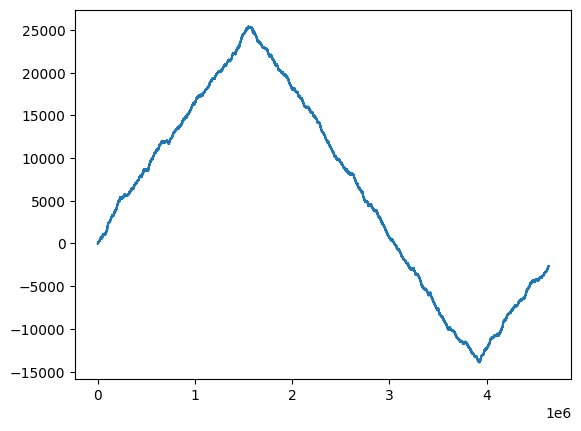

In [30]:
plt.plot(skew_array(ecoli))

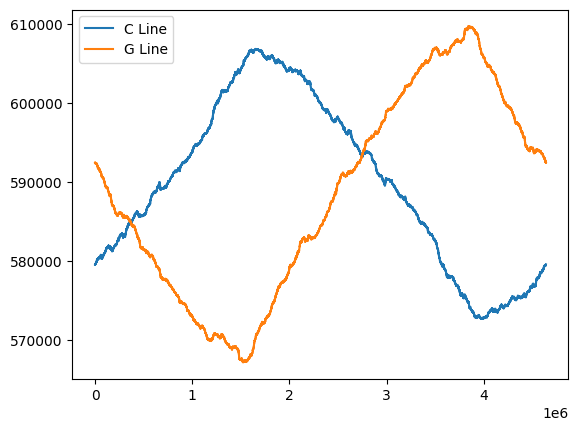

In [32]:
plt.plot(symbol_array(ecoli, 'C').values(), label='C Line')
plt.plot(symbol_array(ecoli, 'G').values(), label='G Line')
plt.legend()
plt.show()

In [46]:
def minimum_skew(genome):
    positions = [] # output variable
    skew = skew_array(genome)
    minimum = min(skew)
    for i in enumerate(skew):
        if(skew[i[0]] == minimum):
            positions.append(i[0])
    return positions

print(minimum_skew(ecoli))


[14]


In [47]:
def hamming_distance(p, q):
    length = min(len(p), len(q))
    hd = 0
    for i in range(length):
        if p[i] != q[i]:
            hd += 1
    return hd

def approximate_pattern_matching(genome, pattern, max_hd):
    positions = []
    for i in range(len(genome) - len(pattern) + 1):
        if(hamming_distance(pattern, genome[i:i+len(pattern)]) <= max_hd):
            positions.append(i)
    return(positions)

def approximate_pattern_count(genome, pattern, max_hd):
    count = 0
    for i in range(len(genome) - len(pattern) + 1):
        if(hamming_distance(pattern, genome[i:i+len(pattern)]) <= max_hd):
            count += 1
    return(count)

[6, 7, 26, 27]
36
